In [1]:
import iplantuml
from code_data_science import data_table as dt
import code_data_science.palette as palette

We can make UML diagrams with PlantUML.  \
See https://plantuml.com/class-diagram  \
The package `iplantuml` offers a magic command for Jupyter notebooks `%%plantuml`.
We want to construct the UML code as a string and then execute the magic command on the string to render the diagram.

Writing output for /Users/kylescully/Repos/visualizations-misc/moderne_visualizations_misc/afa5f9b8-47fa-43bb-a152-ce793ec9324e.uml to afa5f9b8-47fa-43bb-a152-ce793ec9324e.svg


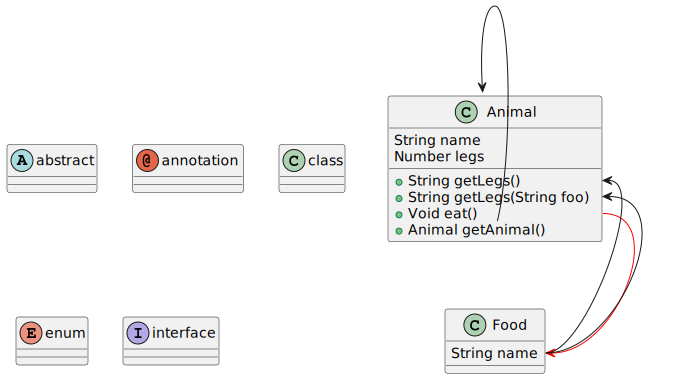

<ExecutionResult object at 1294bb490, execution_count=None error_before_exec=None error_in_exec=None info=<ExecutionInfo object at 1294baad0, raw_cell="%%plantuml

@startuml
abstract   abstract
annotati.." store_history=False silent=False shell_futures=True cell_id=None> result=<IPython.core.display.SVG object>>

In [19]:
stored_plantuml_code = """
@startuml
abstract   abstract
annotation      annotation
class class
enum            enum
interface       interface
class Animal { 
    String name
    Number legs
}

class Animal {
    +String getLegs()
    +String getLegs(String foo)
    +Void eat()
    +Animal getAnimal()
}

class Food {
    String name
}

Animal::eat -[#red]-> Food::name
Food::name --> "Animal::getLegs()"
Food::name --> "Animal::getLegs(String foo)"
"Animal::getAnimal()" --> "Animal"
@enduml
"""

# Create a new cell and use the %%plantuml magic
cell_content = f"%%plantuml\n{stored_plantuml_code}"
get_ipython().run_cell(cell_content)


Now lets try with our own data

In [17]:

df = dt.read_csv("../samples/call_graph.csv")

# i want to find unique values of fromClass

len(df.fromClass.unique())
len(df.toClass.unique())


32

In [28]:
plantuml_code = ["@startuml"]

# TODO: add dynamic coloring based on actions or something in the future
colors = ['black','red', 'blue', 'purple']

# Iterate for class
for index, row in df.iterrows():
    plantuml_code.append(
        f"class {row['fromClass']}")
    plantuml_code.append(
        f"\"{row['fromClass']}\" -[#{colors[0]}]-> \"{row['toClass']}\"")
    

plantuml_code.append("@enduml")

plantuml_code_string = "\n".join(plantuml_code)

print(plantuml_code_string)

@startuml
class org.openrewrite.concourse.FindResource
"org.openrewrite.concourse.FindResource" -[#black]-> "org.openrewrite.yaml.JsonPathMatcher"
class org.openrewrite.concourse.FindResource
"org.openrewrite.concourse.FindResource" -[#black]-> "org.openrewrite.concourse.FindResource$1"
class org.openrewrite.concourse.FindResource$1
"org.openrewrite.concourse.FindResource$1" -[#black]-> "org.openrewrite.yaml.JsonPathMatcher"
class org.openrewrite.concourse.FindResource$1
"org.openrewrite.concourse.FindResource$1" -[#black]-> "org.openrewrite.TreeVisitor"
class org.openrewrite.concourse.FindResource$1
"org.openrewrite.concourse.FindResource$1" -[#black]-> "org.openrewrite.yaml.tree.Yaml$Mapping$Entry"
class org.openrewrite.concourse.FindResource$1
"org.openrewrite.concourse.FindResource$1" -[#black]-> "org.openrewrite.yaml.tree.Yaml$Scalar"
class org.openrewrite.concourse.FindResource$1
"org.openrewrite.concourse.FindResource$1" -[#black]-> "org.openrewrite.marker.SearchResult"
class or

Writing output for /Users/kylescully/Repos/visualizations-misc/moderne_visualizations_misc/0a0971ff-45a1-430e-9d88-bb1f1eafb8b0.uml to 0a0971ff-45a1-430e-9d88-bb1f1eafb8b0.svg


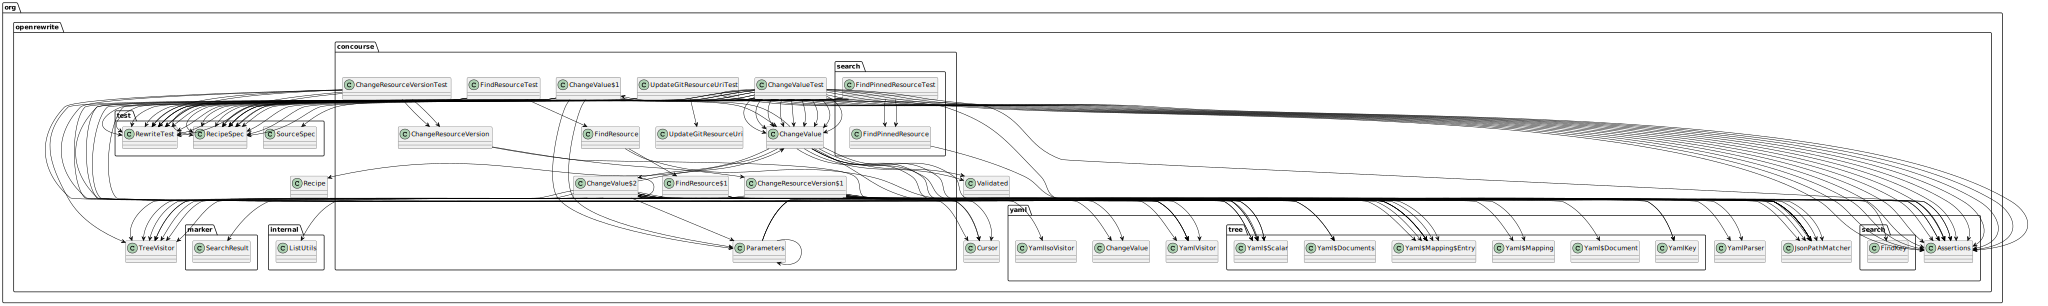

<ExecutionResult object at 1296d8b90, execution_count=None error_before_exec=None error_in_exec=None info=<ExecutionInfo object at 1287fb510, raw_cell="%%plantuml
@startuml
class org.openrewrite.concour.." store_history=False silent=False shell_futures=True cell_id=None> result=<IPython.core.display.SVG object>>

In [29]:
cell_content = f"%%plantuml\n{plantuml_code_string}"
get_ipython().run_cell(cell_content)
